<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras 
from keras.layers import Dense,Flatten, Dropout,Conv2D,MaxPooling2D,Activation
from keras.models import Sequential
from keras.regularizers import l2
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Preprocessing**

In [ ]:
print("X_train shape : {}".format(x_train.shape))
print("X_test shape  : {}".format(x_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape  : {}".format(y_test.shape))  

X_train shape : (60000, 28, 28)
X_test shape  : (10000, 28, 28)
y_train shape : (60000,)
y_test shape  : (10000,)


In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test  = x_test.reshape(10000, 28, 28, 1).astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
print("X_train shape : {}".format(x_train.shape))
print("X_test shape  : {}".format(x_test.shape))

X_train shape : (60000, 28, 28, 1)
X_test shape  : (10000, 28, 28, 1)


Convert Labels to Categorical

In [ ]:
n_classes = 10 #because we have 10 output

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same' ,activation='relu',input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=128 ,validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 73s 152ms/step - loss: 0.9075 - accuracy: 0.8093 - val_loss: 0.2412 - val_accuracy: 0.9712
Epoch 2/50
469/469 [==============================] - 60s 129ms/step - loss: 0.2962 - accuracy: 0.9441 - val_loss: 0.1375 - val_accuracy: 0.9813
Epoch 3/50
469/469 [==============================] - 62s 133ms/step - loss: 0.2228 - accuracy: 0.9570 - val_loss: 0.1121 - val_accuracy: 0.9845
Epoch 4/50
469/469 [==============================] - 61s 131ms/step - loss: 0.1914 - accuracy: 0.9622 - val_loss: 0.0989 - val_accuracy: 0.9867
Epoch 5/50
469/469 [==============================] - 60s 128ms/step - loss: 0.1727 - accuracy: 0.9657 - val_loss: 0.0889 - val_accuracy: 0.9887
Epoch 6/50
469/469 [==============================] - 60s 128ms/step - loss: 0.1582 - accuracy: 0.9686 - val_loss: 0.0828 - val_accuracy: 0.9888
Epoch 7/50
469/469 [==============================] - 59s 126ms/step - loss: 0.1516 - accuracy: 0.9708 - val_loss: 0.0816 - val_ac

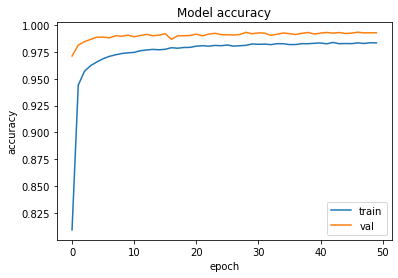

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

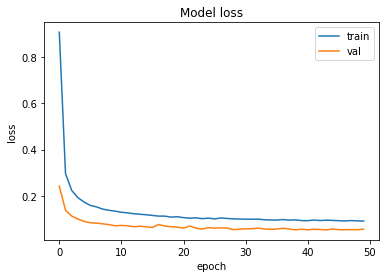

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

**Conclusion**

Based on the graphs above we can say that after 10 epochs the losses and accuracy have not radically changed, but still performance has improved.
It can be reduced to 20 epochs.